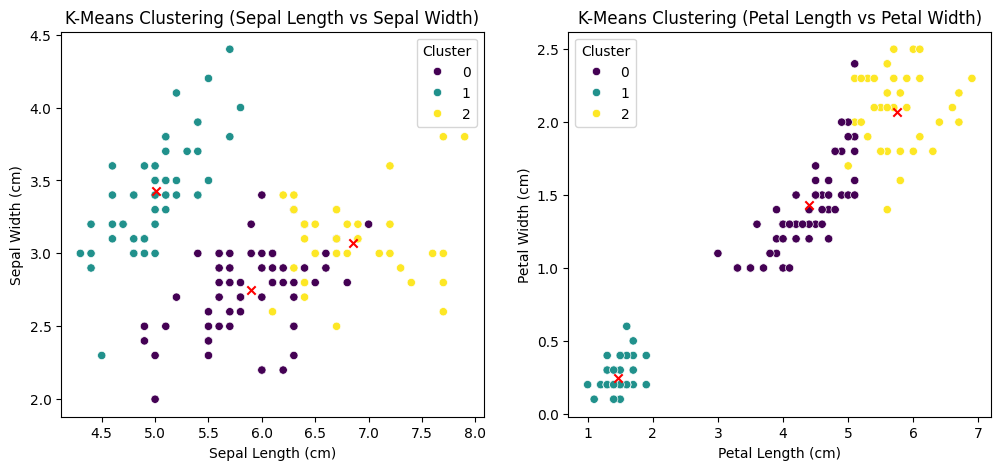

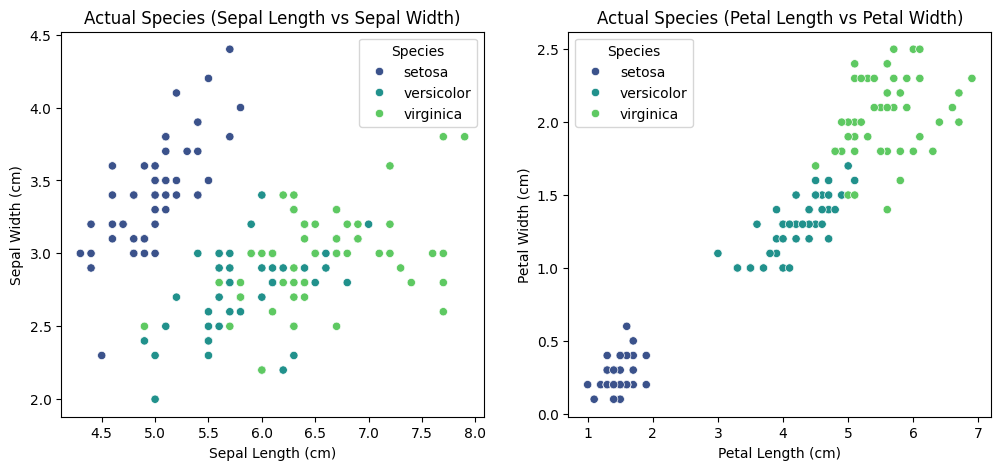

Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
Accuracy: 0.8933


In [1]:
# kmeans和真實label在不同維度的座標平面視覺化、正確率、混淆矩陣
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns

class KMeansCustom:
    def __init__(self, n_clusters=3, max_iters=600, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None

    def initialize_centroids(self, X):
        np.random.seed(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        self.centroids = X[random_idx[:self.n_clusters]]

    def closest_centroid(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def move_centroids(self, X, closest):
        return np.array([X[closest == k].mean(axis=0) for k in range(self.centroids.shape[0])])

    def fit(self, X):
        self.initialize_centroids(X)
        for i in range(self.max_iters):
            old_centroids = self.centroids
            closest = self.closest_centroid(X)
            self.centroids = self.move_centroids(X, closest)
            if np.all(np.abs(self.centroids - old_centroids) < self.tol):
                break
        return closest

    def predict(self, X):
        return self.closest_centroid(X)

# Load the iris dataset
data = pd.read_csv('iris.csv')

# Map species to numerical values
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
data['Species_num'] = data['Species'].map(species_to_num)

# Perform custom K-means clustering
X = data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].values
kmeans = KMeansCustom(n_clusters=3, random_state=42)
clusters = kmeans.fit(X)

# Map the cluster labels to match the actual labels as closely as possible
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(data['Species_num'][mask])[0]

# Compare clustering results with actual class labels
conf_matrix = confusion_matrix(data['Species_num'], labels)
accuracy = accuracy_score(data['Species_num'], labels)

# Visualize the clustering result
data['Cluster'] = clusters

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Sepal.Length', y='Sepal.Width', hue='Cluster', palette='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x')
plt.title('K-Means Clustering (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Petal.Length', y='Petal.Width', hue='Cluster', palette='viridis')
plt.scatter(kmeans.centroids[:, 2], kmeans.centroids[:, 3], c='red', marker='x')
plt.title('K-Means Clustering (Petal Length vs Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster')

plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Sepal.Length', y='Sepal.Width', hue='Species', palette='viridis')
plt.title('Actual Species (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Petal.Length', y='Petal.Width', hue='Species', palette='viridis')
plt.title('Actual Species (Petal Length vs Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')

plt.show()

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")

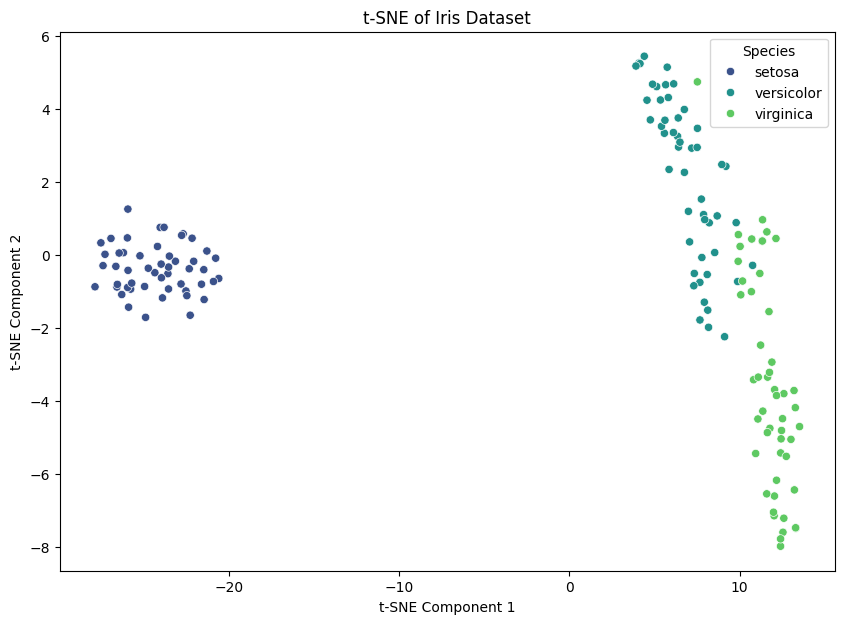

Confusion Matrix:
[[50  0  0]
 [ 0 44  6]
 [ 0  3 47]]
Accuracy: 0.9400


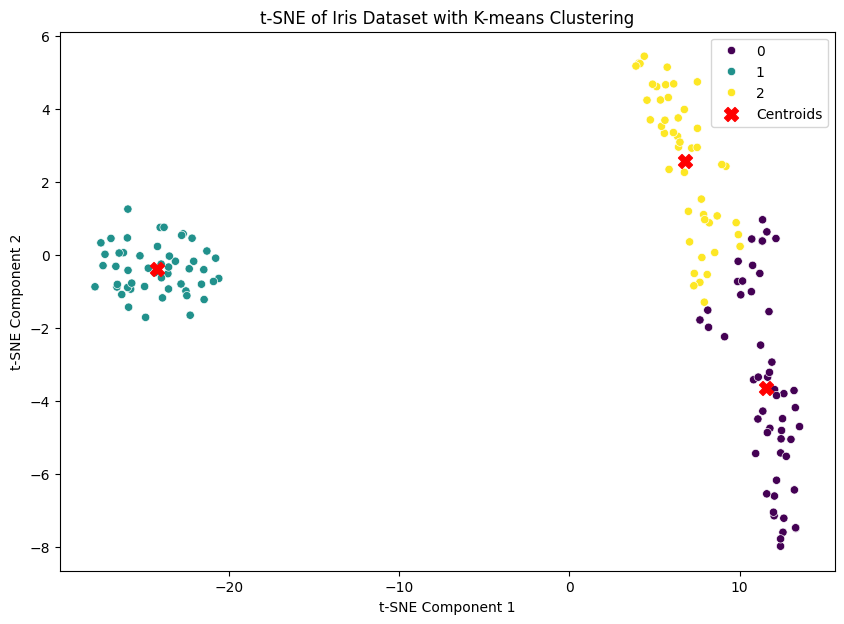

In [2]:
# 前半部把4D資料降維到2D，使用tsne方法，後半部把降維成2D的資料用K-means分群，並將分群結果與真實label比較
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the iris dataset
data = pd.read_csv('iris.csv')  # Ensure the file path is correct

# Map species to numerical values
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
data['Species_num'] = data['Species'].map(species_to_num)

# Perform t-SNE to reduce the 4D data to 2D
X = data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].values
tsne = TSNE(n_components=2, random_state=42)
X_2D = tsne.fit_transform(X)

# Add the t-SNE results to the dataframe
data['TSNE1'] = X_2D[:, 0]
data['TSNE2'] = X_2D[:, 1]

# Visualize the t-SNE result
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='TSNE1', y='TSNE2', hue='Species', palette='viridis')
plt.title('t-SNE of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Species')
plt.show()

# 後半
# Perform K-means clustering on the 2D t-SNE results
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_2D)

# Map the cluster labels to match the actual labels as closely as possible
labels = np.zeros_like(data['Cluster'])
for i in range(3):
    mask = (data['Cluster'] == i)
    labels[mask] = mode(data['Species_num'][mask])[0]

# Compare clustering results with actual class labels
conf_matrix = confusion_matrix(data['Species_num'], labels)
accuracy = accuracy_score(data['Species_num'], labels)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")

# Visualize the clustering result with centroids
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', legend='full')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.title('t-SNE of Iris Dataset with K-means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()